In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50 as myModel
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


In [3]:
model=myModel(weights="imagenet")

In [4]:
img_path = '/cxldata/dlcourse/lion.jpg'

In [5]:
img=image.load_img(img_path, target_size=(224,224))

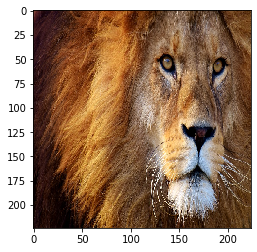

In [6]:
plt.imshow(np.asarray(img))

In [7]:
x=image.img_to_array(img)


In [8]:
x

array([[[132.,  81.,  64.],
        [125.,  72.,  56.],
        [124.,  67.,  56.],
        ...,
        [ 80.,  37.,   5.],
        [ 75.,  34.,   4.],
        [ 81.,  42.,  13.]],

       [[134.,  81.,  63.],
        [126.,  70.,  57.],
        [112.,  55.,  48.],
        ...,
        [ 93.,  53.,  18.],
        [ 87.,  49.,  13.],
        [109.,  71.,  35.]],

       [[142.,  86.,  69.],
        [124.,  67.,  56.],
        [107.,  49.,  45.],
        ...,
        [104.,  65.,  32.],
        [ 87.,  49.,  13.],
        [ 83.,  48.,  10.]],

       ...,

       [[ 39.,  19.,  18.],
        [ 26.,  10.,  11.],
        [ 29.,  13.,  14.],
        ...,
        [118.,  85.,  52.],
        [ 61.,  37.,  13.],
        [ 80.,  55.,  25.]],

       [[ 31.,  11.,  12.],
        [ 21.,   5.,   6.],
        [ 26.,   7.,   9.],
        ...,
        [112.,  79.,  44.],
        [ 68.,  44.,  18.],
        [ 72.,  47.,  17.]],

       [[ 33.,  13.,  15.],
        [ 22.,   6.,   7.],
        [ 26.,  

In [9]:
x.shape

(224, 224, 3)

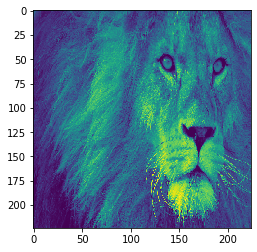

In [10]:
plt.imshow(x.mean(axis=2)) #grayscale image

In [11]:
x=np.array([x])
x

array([[[[132.,  81.,  64.],
         [125.,  72.,  56.],
         [124.,  67.,  56.],
         ...,
         [ 80.,  37.,   5.],
         [ 75.,  34.,   4.],
         [ 81.,  42.,  13.]],

        [[134.,  81.,  63.],
         [126.,  70.,  57.],
         [112.,  55.,  48.],
         ...,
         [ 93.,  53.,  18.],
         [ 87.,  49.,  13.],
         [109.,  71.,  35.]],

        [[142.,  86.,  69.],
         [124.,  67.,  56.],
         [107.,  49.,  45.],
         ...,
         [104.,  65.,  32.],
         [ 87.,  49.,  13.],
         [ 83.,  48.,  10.]],

        ...,

        [[ 39.,  19.,  18.],
         [ 26.,  10.,  11.],
         [ 29.,  13.,  14.],
         ...,
         [118.,  85.,  52.],
         [ 61.,  37.,  13.],
         [ 80.,  55.,  25.]],

        [[ 31.,  11.,  12.],
         [ 21.,   5.,   6.],
         [ 26.,   7.,   9.],
         ...,
         [112.,  79.,  44.],
         [ 68.,  44.,  18.],
         [ 72.,  47.,  17.]],

        [[ 33.,  13.,  15.],
       

In [12]:
x=preprocess_input(x)

In [13]:
x

array([[[[ -39.939003 ,  -35.779    ,    8.32     ],
         [ -47.939003 ,  -44.779    ,    1.3199997],
         [ -47.939003 ,  -49.779    ,    0.3199997],
         ...,
         [ -98.939    ,  -79.779    ,  -43.68     ],
         [ -99.939    ,  -82.779    ,  -48.68     ],
         [ -90.939    ,  -74.779    ,  -42.68     ]],

        [[ -40.939003 ,  -35.779    ,   10.32     ],
         [ -46.939003 ,  -46.779    ,    2.3199997],
         [ -55.939003 ,  -61.779    ,  -11.68     ],
         ...,
         [ -85.939    ,  -63.779    ,  -30.68     ],
         [ -90.939    ,  -67.779    ,  -36.68     ],
         [ -68.939    ,  -45.779    ,  -14.68     ]],

        [[ -34.939003 ,  -30.779    ,   18.32     ],
         [ -47.939003 ,  -49.779    ,    0.3199997],
         [ -58.939003 ,  -67.779    ,  -16.68     ],
         ...,
         [ -71.939    ,  -51.779    ,  -19.68     ],
         [ -90.939    ,  -67.779    ,  -36.68     ],
         [ -93.939    ,  -68.779    ,  -40.68     ]],

In [19]:
preds=model.predict(x)

In [20]:
preds.shape  #1 prob and 1000 category

(1, 1000)

In [28]:
for i, v in enumerate(preds[0]):
    if v > 0.001:
        print(i,'max',v)

291 max 0.9998622


In [25]:
np.argmax(preds[0])# same as the above code; finding the max value

291

In [23]:
preds[0][291]

0.9998622

In [21]:
print('Predicted:', decode_predictions(preds, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02129165', 'lion', 0.9998622), ('n02480495', 'orangutan', 5.4318287e-05), ('n02112137', 'chow', 3.374549e-05)]
